In [5]:
import MSA_entropy_plot as ali
import Datation_event as dat
import Score_ali_phylo as evol



msa1_path = "ENSG00000107643/thoraxe_2/combined_filtered_can.fasta"
msa2_path = "ENSG00000107643/thoraxe_2/combined_filtered_minus_1_alt.fasta"

msa3_path = "ENSG00000107643/thoraxe_2/aligned_sequences/alt_ali.fasta"
msa4_path = "ENSG00000107643/thoraxe_2/aligned_sequences/can_ali.fasta"


msa5_path = "DATA/ENSG00000107643/New_alignement/msa_s_exon_17_0.fasta"
msa6_path = "DATA/ENSG00000107643/inter/Alt_17_0.fasta"



# Pipeline

## 1. **Utility Function Definitions**

- **`calculate_presence_matrix`**: Calculates a presence matrix that represents the percentage of appearance of each amino acid at each position of the alignment. Weights can be applied to positions deemed important.

- **`calculate_sequence_score`**: Evaluates a score for a given sequence based on its conformity to the presence matrix, allowing for an assessment of its potential alignment.

- **`calculate_kl_divergence`** and **`calculate_aa_distribution`**: Used to measure the Kullback-Leibler divergence between the amino acid distributions of columns from two MSAs, important for identifying positions where amino acid profiles differ significantly.

- **`find_important_positions_with_weights`**: Determines important positions based on Kullback-Leibler divergences between two MSAs and assigns weights to these positions.

## 2. **Main Execution**

- Take the sequence to be aligned.
- Identify important positions using Kullback-Leibler divergences between the two updated MSAs.
- Calculate presence matrices for both MSAs considering important positions.
- Compute the sequence score between the two matrices.
- Compare the scores and update the MSAs.


# Understanding the Kullback-Leibler Divergence and Its Relevance in Weighting Factors

The Kullback-Leibler (KL) divergence is a key statistical tool used to quantify how one probability distribution diverges from another, typically a baseline or reference distribution. Commonly applied across fields such as information theory, statistics, and machine learning, the KL divergence is instrumental in analyzing how the distribution of a dataset, denoted \( P \), diverges from a comparative distribution, \( Q \).

Defined mathematically, the divergence from \( P \) to \( Q \) is expressed as:

$$D_{KL}(P \parallel Q) = \sum P(i) \cdot \log\left(\frac{Q(i)}{P(i)}\right)$$

Here, \( P \) and \( Q \) represent the respective probability distributions, and the summation extends over all conceivable events \( i \) within these distributions. The formula highlights several essential characteristics of the KL divergence:

- **Asymmetry in Measurement**: The divergence $$D_{KL}(P \parallel Q)$$ is not the same as $$D_{KL}(Q \parallel P)$$. This reflects the asymmetrical "cost" of deviation, indicating that transitioning from \( P \) to \( Q \) incurs a different "cost" than moving from \( Q \) to \( P \).

- **Zero Divergence Interpretation**: When \( P \) perfectly matches \( Q \), the KL divergence reaches zero, indicating no discrepancy between the distributions. Conversely, larger values signify greater deviations between \( P \) and \( Q \), highlighting substantial differences.

- **Non-negative Values**: The value of $$D_{KL}(P \parallel Q)$$ is always non-negative (\( D_{KL}(P \parallel Q) \geq 0 \)), achieving zero exclusively when \( P \) and \( Q \) are identical.

This measure is particularly useful in the biological sciences for assessing sequence alignments and understanding how significantly sequences deviate from expected patterns, thereby guiding the weighting of sequence positions in analytical models.


This text provides a comprehensive overview while integrating specific points about how the KL divergence is calculated and interpreted within scientific contexts.
## Weights Associated with KL Divergence

1. **Calculating distributions**: For each position in the alignment, calculate the amino acid distribution for each set of sequences (e.g., two different MSAs).

2. **KL divergence for each position**: Calculate the KL divergence between the two distributions at each position. This provides a measure of how much the distributions differ at that specific position.

3. **Weight Assignment**: Use the KL divergence as a "weight" for that position. Higher values indicate more marked differences and, potentially, greater biological importance.





### 1/ 12 species for 12 species : x EM v Thoraxe


### 2/ 100 speices for 100 species : x EM v Thoraxe

In [ ]:
print( msa1_path,msa2_path)
ali.plot_combined_msa_analysis(msa1_path,msa2_path)

## Comparaison  

### 12 species for 100 species

Here we took the thoraxe 100 species already aligned and we realigne with the algo 

before assignement : ENSG00000107643/thoraxe_2/combined_filtered_can.fasta ENSG00000107643/thoraxe_2/combined_filtered_minus_1_alt.fasta :
There are 213 sequences, all of length 24
There are 195 sequences, all of length 24


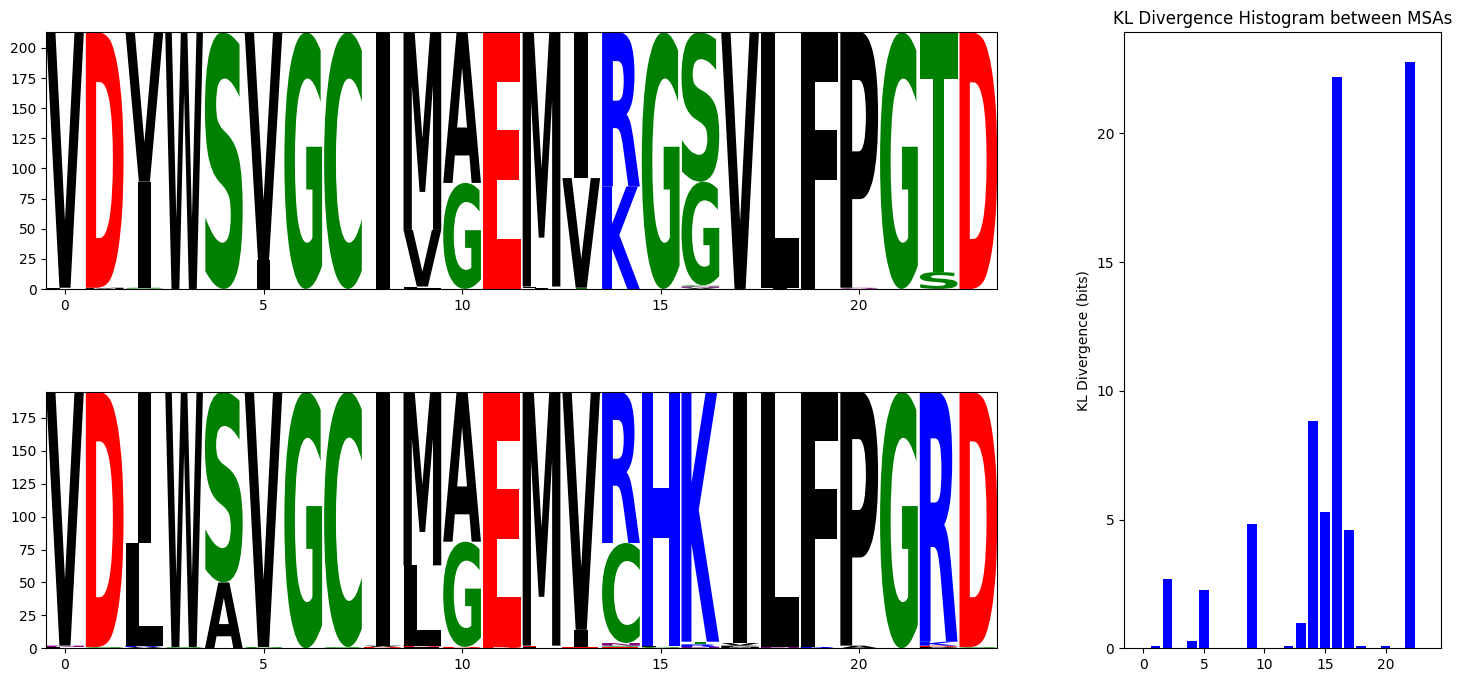

after assignement : ENSG00000107643/thoraxe_2/aligned_sequences/alt_ali.fasta ENSG00000107643/thoraxe_2/aligned_sequences/can_ali.fasta :
There are 191 sequences, all of length 24
There are 214 sequences, all of length 24


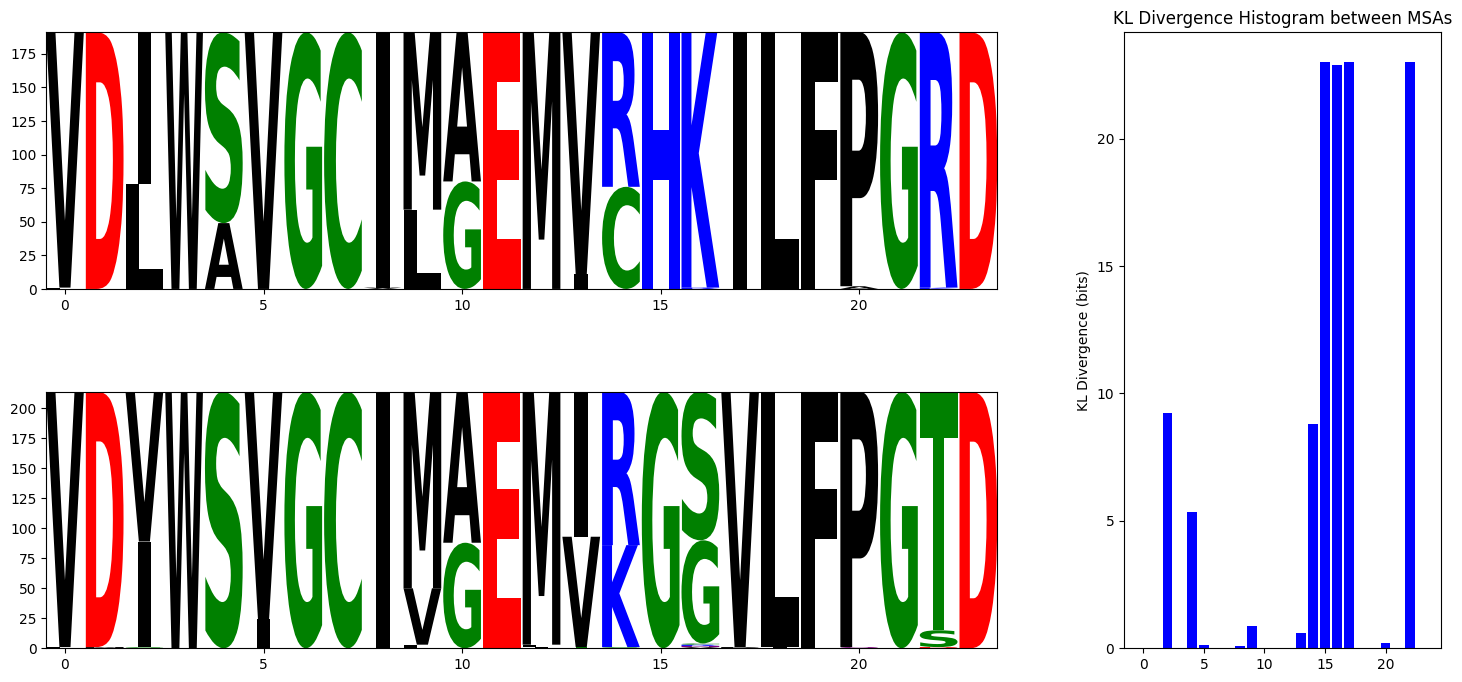

In [6]:




print("after assignement :",msa3_path,msa4_path,":")
ali.plot_combined_msa_analysis(msa3_path,msa4_path)


### 12 species for a3m :





DATA/ENSG00000107643/New_alignement/msa_s_exon_17_0.fasta DATA/ENSG00000107643/inter/Alt_17_0.fasta :
There are 514 sequences, all of length 25
There are 900 sequences, all of length 25


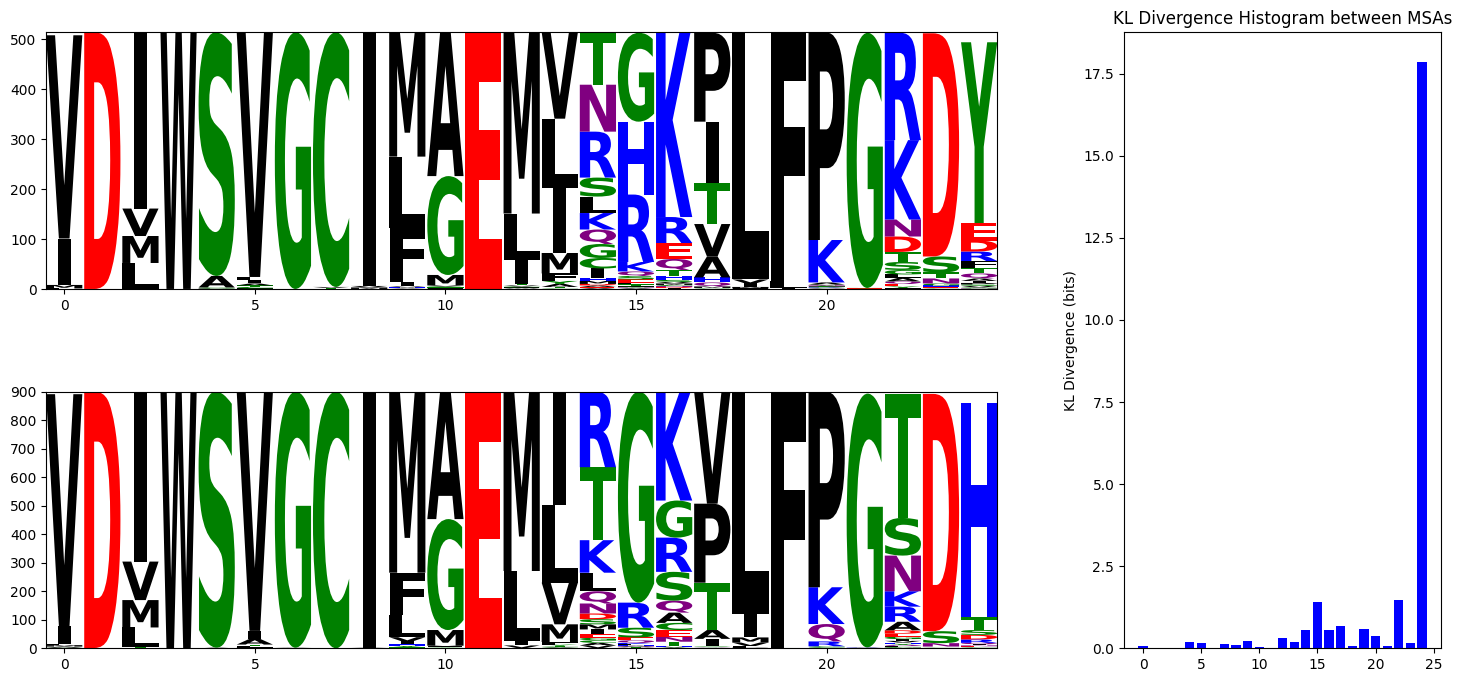

In [7]:
print(msa5_path,msa6_path,":")
ali.plot_combined_msa_analysis(msa5_path,msa6_path)



# Evolutionary distance with proba for a3m (on 12 species )

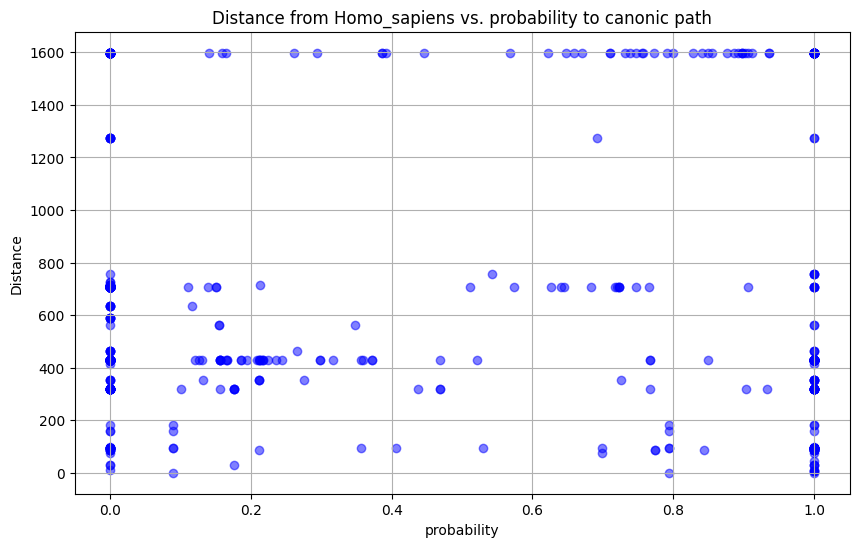

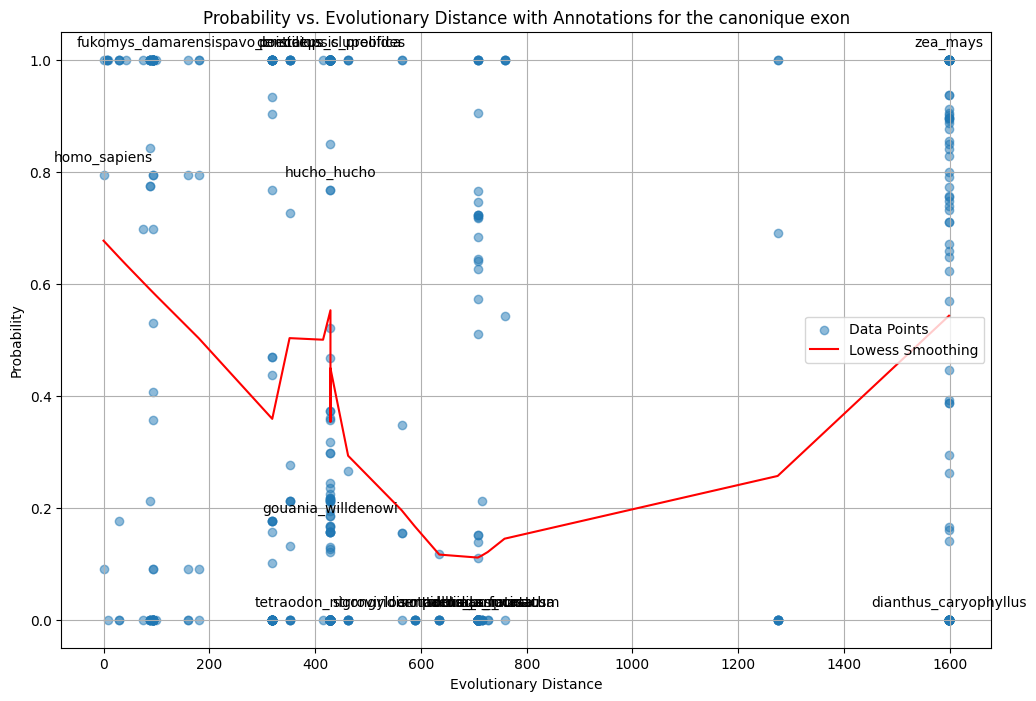

In [8]:
gene = '/Users/louiscarrel/Documents/Alignement_Project/largescale_kinase/DATA/ENSG00000107643/'
path_nwk = gene + 'Species_list_time_tree.nwk'
path_tsv = gene + 'result_with_species_with_proba.tsv'

species_ref = "Homo_sapiens"

dat.plot_distances(path_nwk, path_tsv, species_ref)
dat.plot_probability_curve_with_annotations(path_nwk, path_tsv, species_ref)

# Evolutionary distance with proba for throaxe 100 species 

In [ ]:
gene = '/Users/louiscarrel/Documents/Alignement_Project/largescale_kinase/ENSG00000107643/'
path_nwk = gene + 'Species_list_time_tree.nwk'
path_tsv = gene + 'result_with_species_with_proba.tsv'

species_ref = "Homo_sapiens"

dat.plot_distances(path_nwk, path_tsv, species_ref)
dat.plot_probability_curve_with_annotations(path_nwk, path_tsv, species_ref)